In [16]:
import numpy as np
import matplotlib.pyplot as plt
import suspect
import pydicom
import os
from shutil import copyfile
import subprocess
import glob

In [17]:
code_dir=os.getcwd()
os.chdir("/home/jovyan/work/")

In [178]:
dirs=glob.glob('F3T*')
finals=[]
water=[]
for dir in dirs:
    met=glob.glob(os.path.join(dir,'*metab.dat'))
    print(met)
    data = suspect.io.load_twix(met[0])
    data.shape

    wat=glob.glob(os.path.join(dir,'*wref1.dat')) 
    wref = suspect.io.load_twix(wat[0])
    wref.shape

    channel_weights = suspect.processing.channel_combination.svd_weighting(wref, axis=-2)
    cc_wref = suspect.processing.channel_combination.combine_channels(wref, channel_weights)
    cc_data = suspect.processing.channel_combination.combine_channels(data, channel_weights)

    cc_data.shape

    finals.append(np.mean(cc_data, axis=0))
    water.append(np.mean(cc_wref))

['F3T_2015_24_002/meas_MID00260_FID01671_metab.dat']
header_size: 761536
header_size: 761344
['F3T_2015_24_004/meas_MID00413_FID03761_metab.dat']
header_size: 762784
header_size: 762560
['F3T_2015_24_007/meas_MID01971_FID03545_metab.dat']
header_size: 762784
header_size: 762624
['F3T_2015_24_008/meas_MID00204_FID07157_metab.dat']
header_size: 762240
header_size: 762048
['F3T_2015_24_009/meas_MID00193_FID08528_metab.dat']
header_size: 761760
header_size: 761536
['F3T_2015_24_010/meas_MID00733_FID11873_metab.dat']
header_size: 762688
header_size: 762528
['F3T_2015_24_011/meas_MID00057_FID13069_metab.dat']
header_size: 762656
header_size: 762400
['F3T_2015_24_012/meas_MID00247_FID13846_metab.dat']
header_size: 762880
header_size: 762656
['F3T_2015_24_013/meas_MID00086_FID15691_metab.dat']
header_size: 763104
header_size: 762944
['F3T_2015_24_015/meas_MID01573_FID24947_metab.dat']
header_size: 762656
header_size: 762432
['F3T_2015_24_019/meas_MID02851_FID29764_metab.dat']
header_size: 7628

In [186]:
#plt.plot(finals[4].frequency_axis_ppm(), finals[4].spectrum().real)
#plt.xlim([4, 0])
alligned=[]
for spect in finals:
    alligned.append(suspect.processing.frequency_correction.correct_frequency_and_phase(spect,final,method='sr',frequency_range=(100,400)))

(6.921284378539647e-06-9.0237005301886e-07j)
(1.1102423799580625e-05+8.00193866801573e-06j)
(1.1382702981169778e-05+4.535095231209297e-06j)
(1.035288096894225e-05+1.0385158511234815e-05j)
(2.1848502494449118e-05+5.596029140649133e-07j)
(1.9551885340665105e-05-7.349197600870317e-06j)
(1.3679316628280175e-05+1.1932532583303681e-05j)
(1.4414921085738241e-05+1.0574965615410458e-05j)
(5.432938916499833e-06+6.3906870966446694e-06j)
(2.0164053682525146e-05-6.32032026815003e-07j)
(2.3786844263148797e-05-1.3170962908388827e-06j)
(1.262694821122229e-05+4.560147852716345e-06j)
(1.738354972212699e-05-2.1229038402258736e-06j)
(1.185862499076226e-05-3.832772452737674e-06j)
(1.1361148352210228e-05+1.0612517435617102e-05j)
(1.8621930053693267e-05-2.100977308215447e-06j)


(4.0, 0.0)

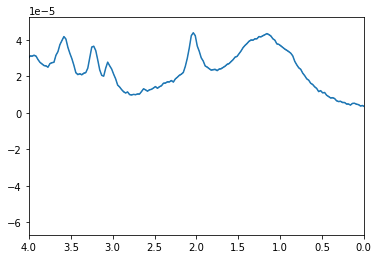

In [202]:

mean=sum(alligned)/len(alligned)
plt.plot(mean.frequency_axis_ppm(), mean.spectrum().real)
#plt.xlim([4, 0])

for w in water:
    print(w)
#rozważyć ważenie sygnałem wody

#std=np.std(alligned,axis=0)
#plt.fill_between(mean.frequency_axis_ppm(),mean.spectrum().real-10*std,mean.spectrum().real+10*std)
#plt.xlim([4, 0])

In [188]:
#EXPORT TO CSV

import csv

nalligned=[]
nalligned.append(mean.frequency_axis_ppm())
for spect in alligned:
    nalligned.append(spect.spectrum().real)


nalligned=np.array(nalligned)

with open('test.csv', "w") as f:
    writer = csv.writer(f)
    for row in nalligned.T:
        writer.writerow(row)

#MATLAB        
#figure; shadedErrorBar(test1(:,1),test(:,2:end)',{@mean,@std})
#xlim([0.2,4]);
#set(gca, 'Xdir', 'reverse')
#xlabel('Frequency [ppm]')
#ylabel('Intensity [a.u.]')

In [24]:
#water suppressed spectroscopy 
data = suspect.io.load_twix("F3T_2015_24_020/meas_MID00703_FID31581_metab.dat")
data.shape

# side comment: error in suspect twix loader https://github.com/openmrslab/suspect/issues/145

header_size: 763264


KeyboardInterrupt: 

In [ ]:
#INDIVIDUAL PROCESSING TEMPLATE

In [7]:
#water reference (not suppressed) 
wref = suspect.io.load_twix("F3T_2015_24_012/meas_MID00248_FID13847_metab_wref1.dat")
wref.shape

header_size: 762656


(38, 4096)

In [8]:
#combine channels
channel_weights = suspect.processing.channel_combination.svd_weighting(wref, axis=-2)
cc_wref = suspect.processing.channel_combination.combine_channels(wref, channel_weights)
cc_data = suspect.processing.channel_combination.combine_channels(data, channel_weights)

In [9]:
cc_data.shape

(256, 4096)

In [10]:
#accumulate data
#wref_final = np.mean(cc_wref[0], axis=0)
final = np.mean(cc_data, axis=0)


(4.0, 0.0)

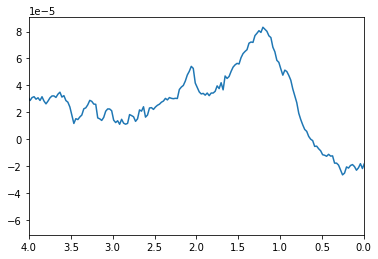

In [11]:
plt.plot(final.frequency_axis_ppm(), final.spectrum().real)
plt.xlim([4, 0])
#plt.ylim([-1e-4,0.5e-3])

In [12]:
tarquin_results = suspect.io.tarquin.process(final, cc_wref, options={"pul_seq": "press",
                                                           "int_basis": "1h_brain",
                                                           "ref_signals": "1h_naa_cr_cho_lip",
                                                           "start_pnt": "10",
                                                           })
copyfile("/tmp/output.txt","./tarquin.txt")

'./tarquin.txt'

(4.0, 0.0)

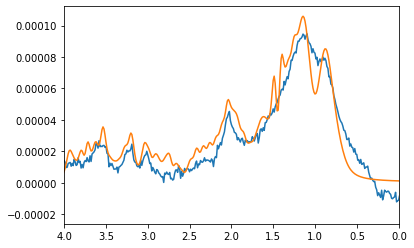

In [15]:
plt.plot(tarquin_results["plots"]["data"].frequency_axis_ppm(), tarquin_results["plots"]["data"].real)
plt.plot(tarquin_results["plots"]["fit"].frequency_axis_ppm(), tarquin_results["plots"]["fit"].real)
plt.xlim([4, 0])

In [42]:
tarquin_results["metabolite_fits"]

{'-CrCH2': {'concentration': '0.000', 'sd': 'inf'},
 'Ala': {'concentration': '2.708', 'sd': '213.1'},
 'Asp': {'concentration': '5.061', 'sd': '27.42'},
 'Cr': {'concentration': '0.000', 'sd': 'inf'},
 'GABA': {'concentration': '6.063', 'sd': '39.54'},
 'GPC': {'concentration': '1.272', 'sd': '26.47'},
 'Glc': {'concentration': '1.902', 'sd': '66.75'},
 'Gln': {'concentration': '3.941', 'sd': '22.89'},
 'Glu': {'concentration': '0.000', 'sd': 'inf'},
 'Gua': {'concentration': '0.000', 'sd': 'inf'},
 'Ins': {'concentration': '7.191', 'sd': '10.76'},
 'Lac': {'concentration': '0.3361', 'sd': '1310.'},
 'Lip09': {'concentration': '3.737', 'sd': '169.9'},
 'Lip13a': {'concentration': '8.082', 'sd': '1574.'},
 'Lip13b': {'concentration': '0.5108', 'sd': '1567.'},
 'Lip20': {'concentration': '0.000', 'sd': 'inf'},
 'MM09': {'concentration': '21.37', 'sd': '190.0'},
 'MM12': {'concentration': '7.696', 'sd': '516.2'},
 'MM14': {'concentration': '13.75', 'sd': '515.6'},
 'MM17': {'concentratio

In [11]:
# create a parameters dictionary to set the basis set to use
params = {
    "FILBAS": "/home/jovyan/work/basis/press_te30_3t_all_v3.basis",
    "key": 210387309,
    "OWNER": "OpenMRSLab",
    "NEACH": 99,
    "LCSV": 11
}
suspect.io.lcmodel.write_all_files("lcmodel_data/example.RAW", data=final, wref_data=cc_wref, params=params)

In [12]:
myinput = open('./lcmodel_data/example_sl0.CONTROL')
result = subprocess.run("/home/jovyan/.lcmodel/bin/lcmodel",stdin=myinput,stdout=subprocess.PIPE)
subprocess.run(["ps2pdf","lcmodel_data/example.PS","lcmodel_data/example.PDF"])
print(result.stdout.decode())